In [1]:
# NOTE: Run 'python generate_data.py' before executing notebook to generate 'troop_movements.csv' file

import pandas as pd
import numpy as np

data = pd.read_csv('troop_movements.csv')

print("First few rows of the DataFrame:")
print(data.head())

First few rows of the DataFrame:
             timestamp  unit_id           unit_type empire_or_resistance  \
0  2025-03-18 11:43:54        1  resistance_soldier               empire   
1  2025-03-18 11:43:53        2        tie_silencer           resistance   
2  2025-03-18 11:43:52        3               at-at           resistance   
3  2025-03-18 11:43:51        4             unknown           resistance   
4  2025-03-18 11:43:50        5  resistance_soldier           resistance   

   location_x  location_y  destination_x  destination_y    homeworld  
0           6           6              3              8      Stewjon  
1           2           1              5              9     Dathomir  
2           6           6              5              7        Kalee  
3           5           9              7              6  Glee Anselm  
4           1           5             10              7       Ryloth  


In [2]:
#Showing Counts of Empire vs. Resistance
df_Count = pd.DataFrame(data)

print("\nSorting the DataFrame by empire_or_resistance:")
value_counts = df_Count['empire_or_resistance'].value_counts().reset_index()

print(value_counts.head())


Sorting the DataFrame by empire_or_resistance:
  empire_or_resistance  count
0           resistance    510
1               empire    490


In [3]:
unit_type_counts_size = data.groupby('unit_type').size()
print("Counts of characters by unit_type", unit_type_counts_size)


Counts of characters by unit_type unit_type
at-at                 116
at-st                 128
resistance_soldier    118
stormtrooper          130
tie_fighter           113
tie_silencer          120
unknown               135
x-wing                140
dtype: int64


In [5]:
#Showing Counts of Characters By Homeworld

print("\nSorting the DataFrame by homeworld:")
value_counts2 = data.groupby('homeworld').size()

print(value_counts2)



Sorting the DataFrame by homeworld:
homeworld
Alderaan        27
Aleen Minor     24
Bestine IV      19
Cerea           17
Champala        22
Chandrila       22
Concord Dawn    23
Corellia        21
Dagobah         21
Dathomir        26
Dorin           29
Eriadu          15
Glee Anselm     24
Haruun Kal      20
Iktotch         34
Iridonia        20
Kalee           36
Kashyyyk        28
Malastare       26
Mirial          19
Mon Cala        21
Muunilinst      25
Naboo           24
Ojom            26
Quermia         25
Rodia           32
Ryloth          21
Serenno         22
Shili           21
Skako           27
Socorro         23
Stewjon         21
Sullust         23
Tatooine        32
Tholoth         21
Toydaria        18
Trandosha       20
Troiken         26
Tund            24
Umbara          31
Vulpter         20
Zolan           24
dtype: int64


In [6]:
def is_resistance(row):
        if row['empire_or_resistance'] == "resistance":
            return True
        else:
            return False
data['is_resistance'] = data.apply(is_resistance, axis=1)
print(data.head())

             timestamp  unit_id           unit_type empire_or_resistance  \
0  2025-03-18 11:43:54        1  resistance_soldier               empire   
1  2025-03-18 11:43:53        2        tie_silencer           resistance   
2  2025-03-18 11:43:52        3               at-at           resistance   
3  2025-03-18 11:43:51        4             unknown           resistance   
4  2025-03-18 11:43:50        5  resistance_soldier           resistance   

   location_x  location_y  destination_x  destination_y    homeworld  \
0           6           6              3              8      Stewjon   
1           2           1              5              9     Dathomir   
2           6           6              5              7        Kalee   
3           5           9              7              6  Glee Anselm   
4           1           5             10              7       Ryloth   

   is_resistance  
0          False  
1           True  
2           True  
3           True  
4           Tru

In [7]:
! pip install seaborn
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


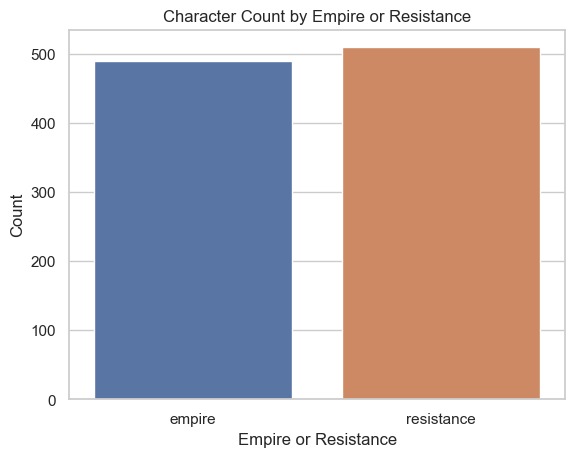

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid")

sns.countplot(data=data, x="empire_or_resistance", hue= "empire_or_resistance")
plt.title('Character Count by Empire or Resistance')
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


X = data[['unit_type', 'homeworld']]  # Features: unit_type, homeworld
y = data['is_resistance']  # Target variable


categorical_features = ['unit_type', 'homeworld']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])


decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


decision_tree_pipeline.fit(X_train, y_train)


y_pred = decision_tree_pipeline.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.685


In [12]:
# Converting categorical features to numerics
X_encoded = pd.get_dummies(X)
print("First rows of categorical features AS NUMERICS: \n", X_encoded.head())


First rows of categorical features AS NUMERICS: 
    unit_type_at-at  unit_type_at-st  unit_type_resistance_soldier  \
0            False            False                          True   
1            False            False                         False   
2             True            False                         False   
3            False            False                         False   
4            False            False                          True   

   unit_type_stormtrooper  unit_type_tie_fighter  unit_type_tie_silencer  \
0                   False                  False                   False   
1                   False                  False                    True   
2                   False                  False                   False   
3                   False                  False                   False   
4                   False                  False                   False   

   unit_type_unknown  unit_type_x-wing  homeworld_Alderaan  \
0              F

In [13]:
# Get Feature Importance From numerics

# Get feature importances
importances = decision_tree_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})
print("Printing head of feature importances \n", feature_importances.head())

Printing head of feature importances 
                         Feature  Importance
0               unit_type_at-at    0.075344
1               unit_type_at-st    0.033215
2  unit_type_resistance_soldier    0.045519
3        unit_type_stormtrooper    0.052680
4         unit_type_tie_fighter    0.035347


Printing first rows of feature importances - SORTED: 
                          Feature  Importance
0                unit_type_at-at    0.075344
3         unit_type_stormtrooper    0.052680
29          homeworld_Muunilinst    0.047031
2   unit_type_resistance_soldier    0.045519
8             homeworld_Alderaan    0.039142


C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_6148\1846015147.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, horizontalalignment='right')


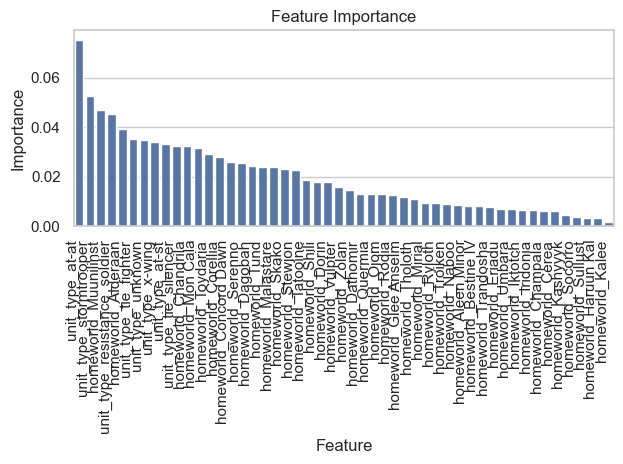

In [14]:
# Sort Feature Importance
sorted_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Printing first rows of feature importances - SORTED: \n", sorted_importances.head())

# Create boxplot using feature importance
barplot = sns.barplot(sorted_importances, x="Feature", y="Importance")

# Rotate x-axis label
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, horizontalalignment='right')

# Add title to plot
plt.title("Feature Importance")

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# Save model to pickle file
import pickle

# Specify the file path to save the pipeline
file_path = 'trained_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(decision_tree_pipeline, file)

In [16]:
real_data = pd.read_csv('troop_movements_1m.csv')

print("First few rows of the DataFrame:")
print(real_data.head())

First few rows of the DataFrame:
             timestamp  unit_id     unit_type  location_x  location_y  \
0  2023-06-03 03:19:15   919214  tie_silencer         2.0         5.0   
1  2023-02-24 13:50:40  9467154  stormtrooper         9.0         0.0   
2  2023-03-29 19:54:55  6585778  tie_silencer         0.0         6.0   
3  2023-04-30 00:58:11  3878023  tie_silencer         4.0         2.0   
4  2023-04-10 22:00:26  5537117         at-st         6.0         8.0   

   destination_x  destination_y    homeworld  
0              9              3  Aleen Minor  
1              9              1    Malastare  
2              5              9      Serenno  
3              9              9         Tund  
4              5              8        Skako  


In [17]:
real_data['unit_type'] = real_data['unit_type'].apply(lambda x: "unknown" if x == "invalid_unit" else x)
real_data['location_x'] = real_data['location_x'].ffill()
real_data['location_y'] = real_data['location_y'].ffill()

In [18]:
! pip install pyarrow
! pip install fastparquet

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
real_data.to_parquet('troop_movements_1m.parquet', engine='pyarrow')

In [20]:
final_data = pd.read_parquet('troop_movements_1m.parquet', engine='pyarrow')
print(final_data.head())

             timestamp  unit_id     unit_type  location_x  location_y  \
0  2023-06-03 03:19:15   919214  tie_silencer         2.0         5.0   
1  2023-02-24 13:50:40  9467154  stormtrooper         9.0         0.0   
2  2023-03-29 19:54:55  6585778  tie_silencer         0.0         6.0   
3  2023-04-30 00:58:11  3878023  tie_silencer         4.0         2.0   
4  2023-04-10 22:00:26  5537117         at-st         6.0         8.0   

   destination_x  destination_y    homeworld  
0              9              3  Aleen Minor  
1              9              1    Malastare  
2              5              9      Serenno  
3              9              9         Tund  
4              5              8        Skako  


In [21]:
import pickle 
with open('trained_model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)

In [22]:
final_data_X = final_data[['unit_type', 'homeworld']]
is_resistance_preds = loaded_model.predict(final_data_X)
print(is_resistance_preds)

[False False False ...  True False False]


In [23]:
final_data['predictions'] = is_resistance_preds
print(final_data.head())

             timestamp  unit_id     unit_type  location_x  location_y  \
0  2023-06-03 03:19:15   919214  tie_silencer         2.0         5.0   
1  2023-02-24 13:50:40  9467154  stormtrooper         9.0         0.0   
2  2023-03-29 19:54:55  6585778  tie_silencer         0.0         6.0   
3  2023-04-30 00:58:11  3878023  tie_silencer         4.0         2.0   
4  2023-04-10 22:00:26  5537117         at-st         6.0         8.0   

   destination_x  destination_y    homeworld  predictions  
0              9              3  Aleen Minor        False  
1              9              1    Malastare        False  
2              5              9      Serenno        False  
3              9              9         Tund        False  
4              5              8        Skako        False  
